In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx 

In [2]:
def decodeBox(yolobox, size, dscale):
    i, j, x, y, w, h = yolobox
    cxt = j*dscale + x*dscale
    cyt = i*dscale + y*dscale
    wt = w*size
    ht = h*size
    return [cxt, cyt, wt, ht]

def bboxdraw(img, label, dscale=32):
    assert label.shape == (7,7,5)
    size = img.shape[1]
    ilist, jlist = np.where(label[:,:,0]==1)
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for i,j in zip(ilist, jlist): 
        cx,cy,w,h = label[i,j,1:]
        cxt, cyt, wt ,ht = decodeBox([i, j, cx,cy,w,h], size, dscale)
        # Create a Rectangle patch
        rect = patches.Rectangle((cxt-wt/2,cyt-ht/2), wt,ht,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [3]:
data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat.rec',
                             data_shape=(3,224,224),
                             label_width=7*7*5, 
                             batch_size=1,)

In [4]:
num=3
data.reset()
for i in range(num):
    batch = data.next()

In [5]:
batch.data

[<NDArray 1x3x224x224 @cpu(0)>]

In [6]:
batch.label 7*7*5

[<NDArray 1x245 @cpu(0)>]

In [7]:
img = batch.data[0].asnumpy()[0]
label = batch.label[0].asnumpy().reshape((7,7,5))

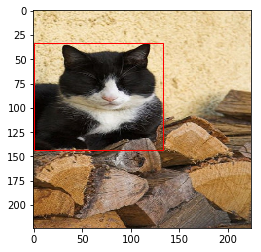

In [8]:
img4show = np.uint8(img.transpose((1,2,0)))
bboxdraw(img4show, label)